# Bike Sharing Assigment
## Problem Statement
BoomBikes, a US-based bike-sharing provider, has faced a significant revenue decline due to the COVID-19 pandemic. To recover and prepare for post-pandemic demand, the company aims to analyze factors influencing shared bike usage. 

### Key Points:

- **Service Overview**: Bike-sharing allows users to borrow and return bikes at computer-controlled docks for a price or free.
- **Business Challenge**: The pandemic has caused revenue dips, jeopardizing the company's sustainability.
- **Objective**: Develop a business plan to boost revenue post-pandemic by understanding bike demand patterns.
- **Data Availability**: A large dataset capturing daily bike demands and influencing factors, including meteorological conditions and behavioral styles.
- **Research Goals**:
  1. Identify significant factors influencing bike demand.
  2. Evaluate how well these factors predict demand.

### Business Goals:

- Model the demand for shared bikes using available independent variables.
- Enable management to understand how demands vary with different features.
- Support management in adjusting business strategies to meet demand levels and customer expectations.
- Provide insights into demand dynamics for potential entry into new markets.

### Dataset
The data in day.csv contains details of booking day including date, weekday, working month, year, season, temprature, windspeed, temprature weather and count of users registerd and count of rental bikes. As day infmation might play a cruical role in bike demand and rental. Thus it is important for us to understand and analyse dataset properly.

### 1. Dataset Understanding
Before starting the Data Prepations and model building, Let's first dive into important data points available in the dataset.

- dteday: Entry Date
- season: Entry Season(Spring, Summer, Fall, Winter)
- yr: Entry Year(Could be 2018 & 2019)
- mnth: Entry Month(January to December)
- holiday: Weather day is a holiday or not
- weekday: day of the week
- workingday: if day is neither weekend nor holiday
- weathersit: Describes the Weather Situation 
- temp: temperature in Celsius
- atemp: Feels like temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

**Note:** For this problem we would be using '_cnt_' as our target varible(**Dependent Variable**) and we would evaluate it using other preduictior vairbales(**Independent Variables**) by identrify their statistical significance.


### 2. Data Preparation & Loading:
Steps invoklded with data preparation:
1. Missing value imputation

2. Outlier treatment

3. Dummy variable creation for categorical variables

4. Test-train split of the data

5. Standardisation of the scales of continuous variables

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# to create train/test data
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
# Importing day.csv

bike_df = pd.read_csv('day.csv')

print("Shape of initial dataframe:")
print(bike_df.shape)

Shape of initial dataframe:
(730, 16)


In [4]:
# Looking at the first five rows
print("Top 5 rows of dataset:")
bike_df.head()

Top 5 rows of dataset:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
print("Bottom 5 rows of dataset:")
bike_df.tail()

Bottom 5 rows of dataset:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


### 3. Data Pre-Processing

In [6]:
# as we already have Date information as Year, Month, Weekday Working Day we can get rid of dteday column
# also we should get rid of instant as it won't add any statistical significance for prediction
bike_df.drop(['instant', 'dteday'], axis = 1, inplace = True)

In [7]:
# We could also drop casual & registered as it already part of count and won't have any statistical significance
bike_df.drop(['casual', 'registered'], axis = 1, inplace = True)

In [8]:
# Looking again at the first five rows after drop
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [9]:
# Check missing values
print(bike_df.isnull().sum())

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


**Missing value imputation :** All columns have **non-null** values, not needed.

In [10]:
#Map all values of categorical varibavaribales from given data dictionary
# Season
#Map season values (1:spring, 2:summer, 3:fall, 4:winter)
bike_df.season.replace({1:"Spring", 2:"Summer", 3:"Fall", 4:"Winter"}, inplace=True)

# # Year
# #Map year values (0: 2018, 1:2019)
# bike_df.yr.replace({0:"2018", 1:"2019"}, inplace=True)
# We don't need to map year as it is already in numeric format

# Month
#Map mnth values (Jan to Dec)
bike_df.mnth.replace({1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"},inplace=True)

# # Holiday
# #Map holiday values
# bike_df.holiday.replace({0: "No", 1: "Yes"}, inplace=True)
# We don't need to map holiday as it is already in numeric format

# Weekday
#Mape weekday values
bike_df.weekday.replace({0: 'Tue', 1: 'Wed', 2:'Thur', 3:'Fri', 4:'Sat', 5:'Sun', 6:'Mon'}, inplace=True)

# # workingday
# #Map workingday values
# bike_df.workingday.replace({0: "No", 1: "Yes"}, inplace=True)
# We don't need to map workingday as it is already in numeric format

# weathersit
#Map weathersit values
bike_df.weathersit.replace({1:"Clear", 2: "Mist Cloudy", 3: "Light Rain", 4:"Heavy Rain"}, inplace=True)

In [11]:
# Pritting all mapped values counts

print(bike_df.season.value_counts())
print("##############################################################")

print(bike_df.mnth.value_counts())
print("##############################################################")

print(bike_df.weekday.value_counts())
print("##############################################################")

print(bike_df.weathersit.value_counts())
print("##############################################################")

season
Fall      188
Summer    184
Spring    180
Winter    178
Name: count, dtype: int64
##############################################################
mnth
Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: count, dtype: int64
##############################################################
weekday
Mon     105
Tue     105
Wed     105
Thur    104
Sat     104
Sun     104
Fri     103
Name: count, dtype: int64
##############################################################
weathersit
Clear          463
Mist Cloudy    246
Light Rain      21
Name: count, dtype: int64
##############################################################


In [12]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


### 4. EDA - Exploratiory Data Analsysis

#### 4.1. Univariate Analysis

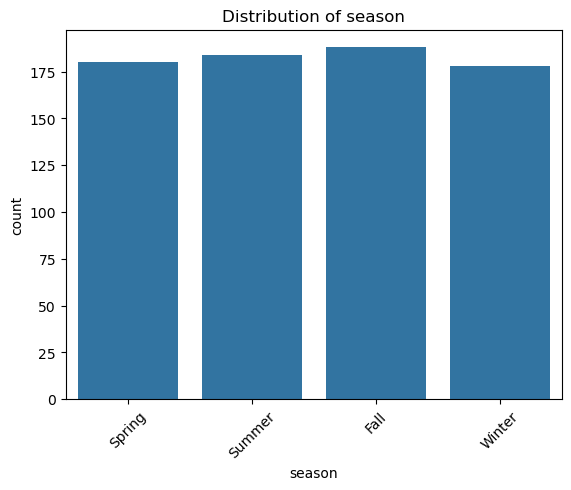

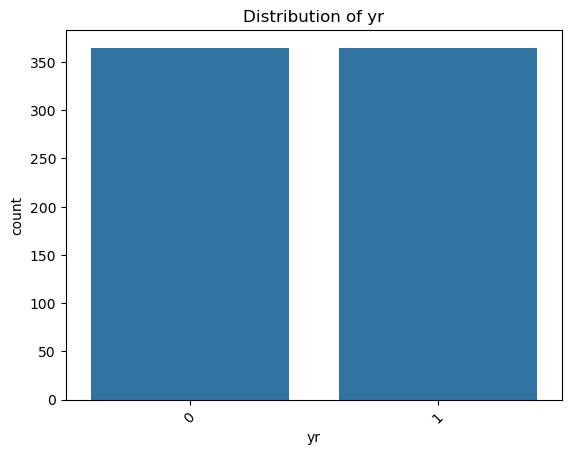

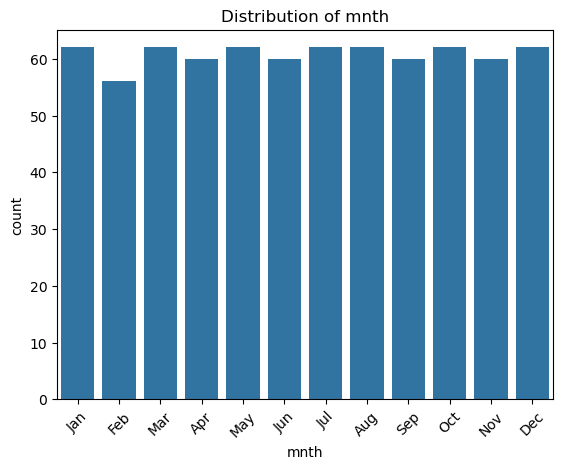

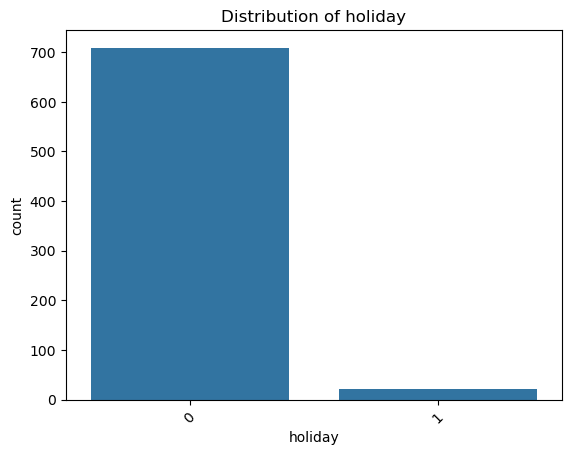

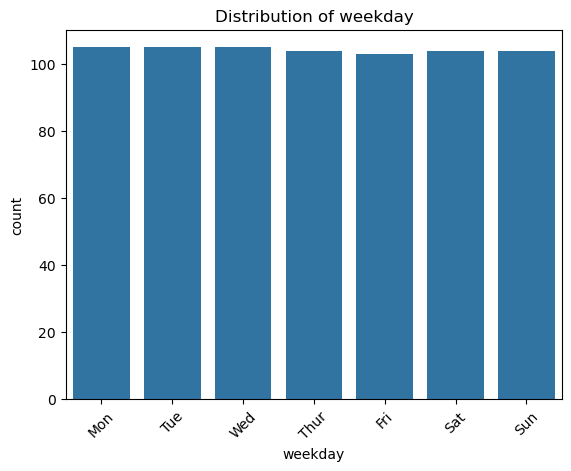

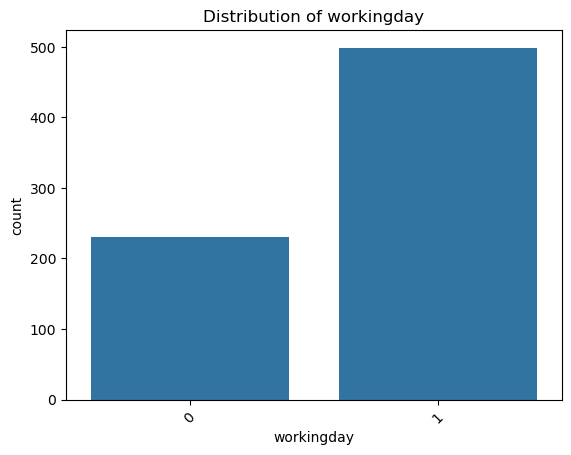

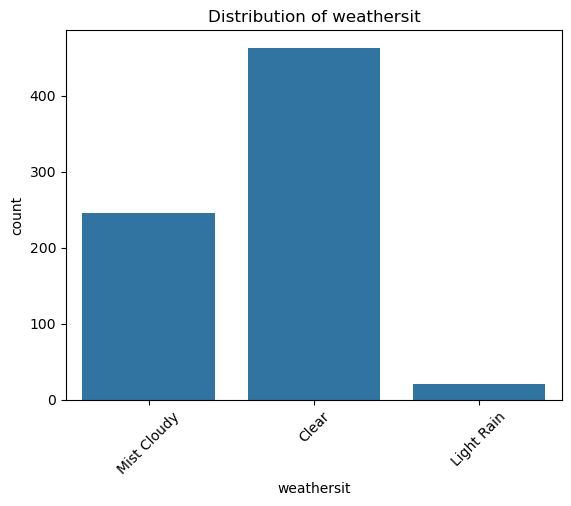

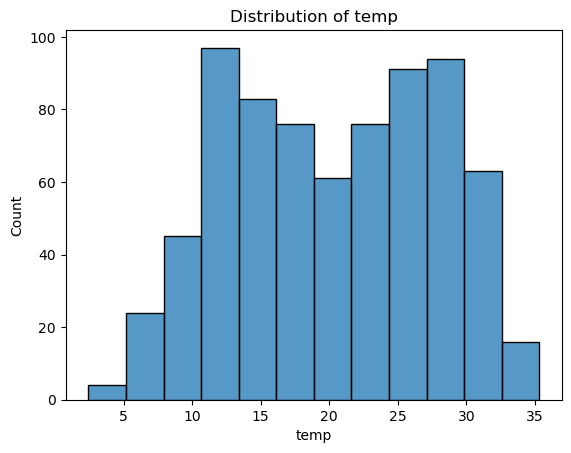

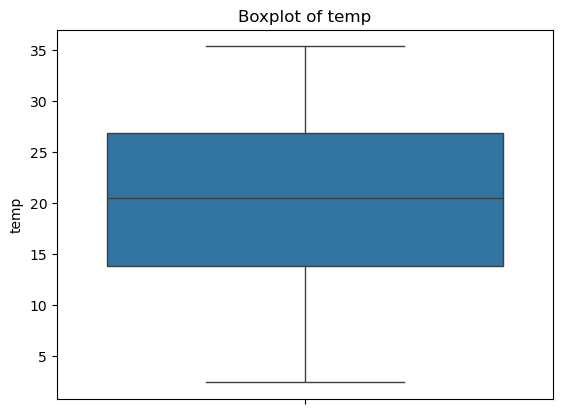

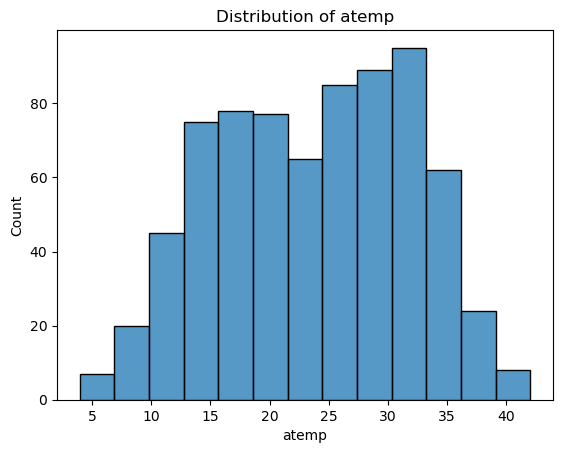

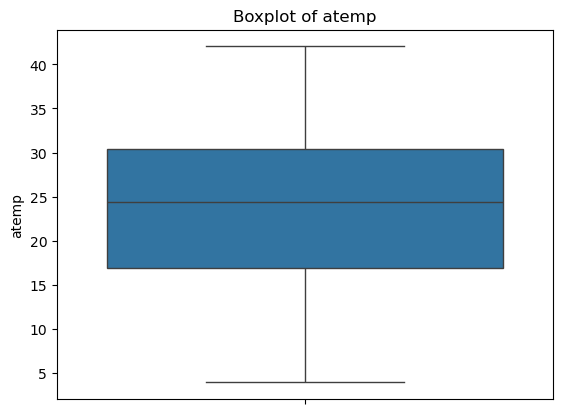

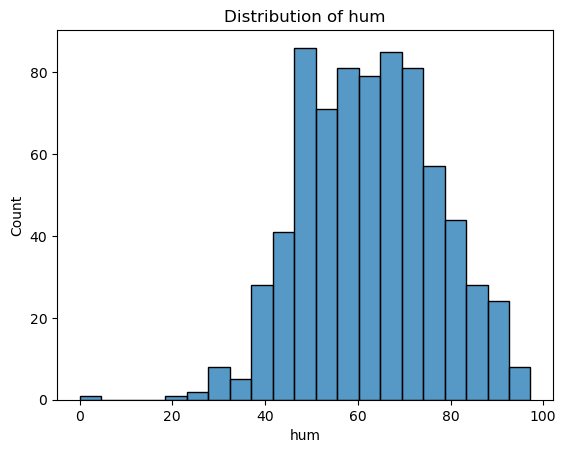

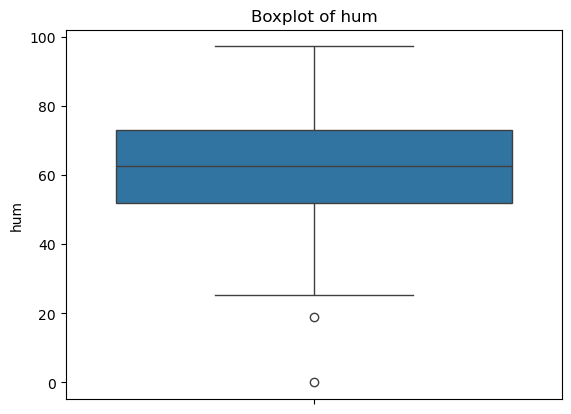

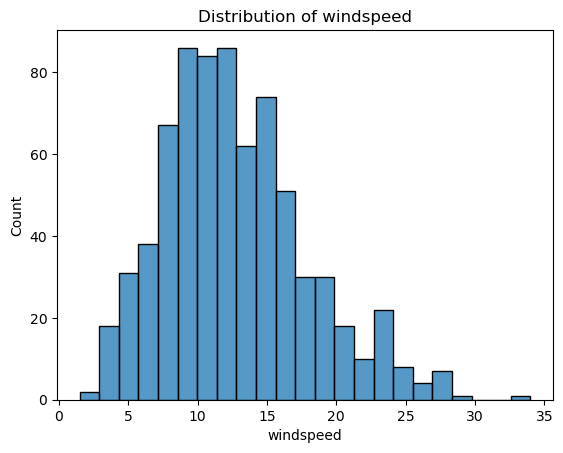

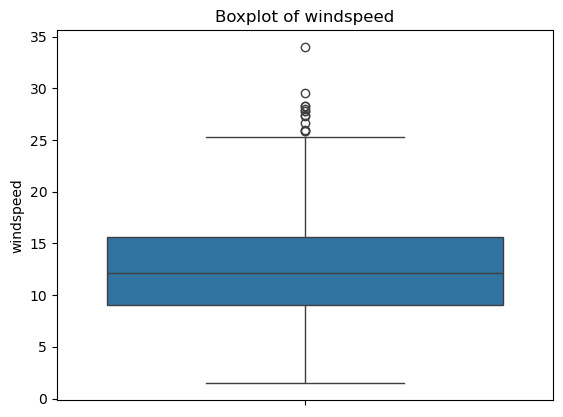

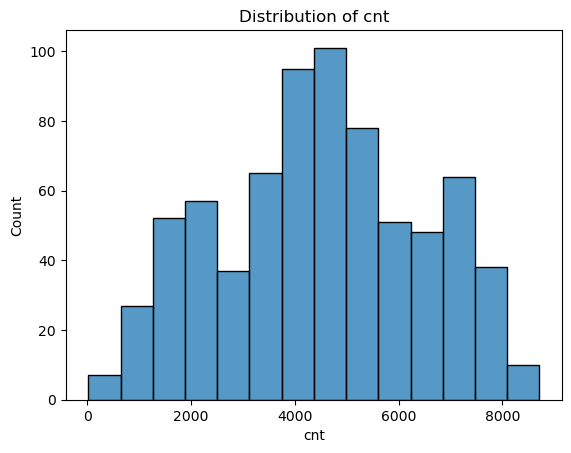

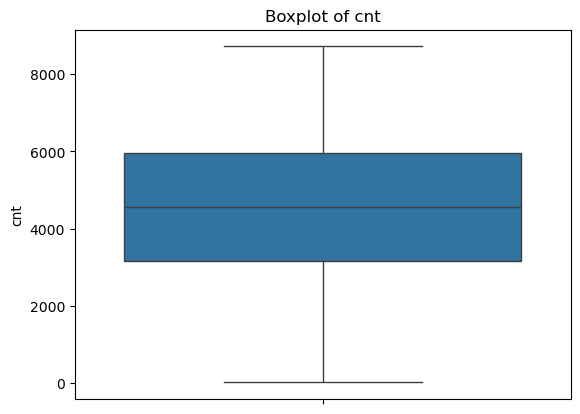

In [13]:
# Univariate EDA
for column in bike_df.columns:
    if bike_df[column].dtype == 'object' or column in ['yr', 'holiday', 'workingday']:  # for categorical variables
        sns.countplot(x=column, data=bike_df)
        plt.title(f'Distribution of {column}')
        plt.xticks(rotation=45)
        plt.show()
    elif column not in ['yr', 'holiday', 'workingday']:  # for numerical variables
        sns.histplot(bike_df[column])
        plt.title(f'Distribution of {column}')
        plt.show()
        
        sns.boxplot(bike_df[column])
        plt.title(f'Boxplot of {column}')
        plt.show()


#### 4.2. Bivariate Analyis

In [14]:
# Get all numeric columns except 'cnt', 'yr', 'holiday', 'workingday'
numeric_columns = bike_df.select_dtypes(include='number').columns.tolist()
# 'yr', 'holiday', 'workingday' are categorical variables
other_cat_columns = ['yr', 'holiday', 'workingday'] # remove 'yr', 'holiday', 'workingday' from the list
numeric_columns = [column for column in numeric_columns if column not in other_cat_columns]

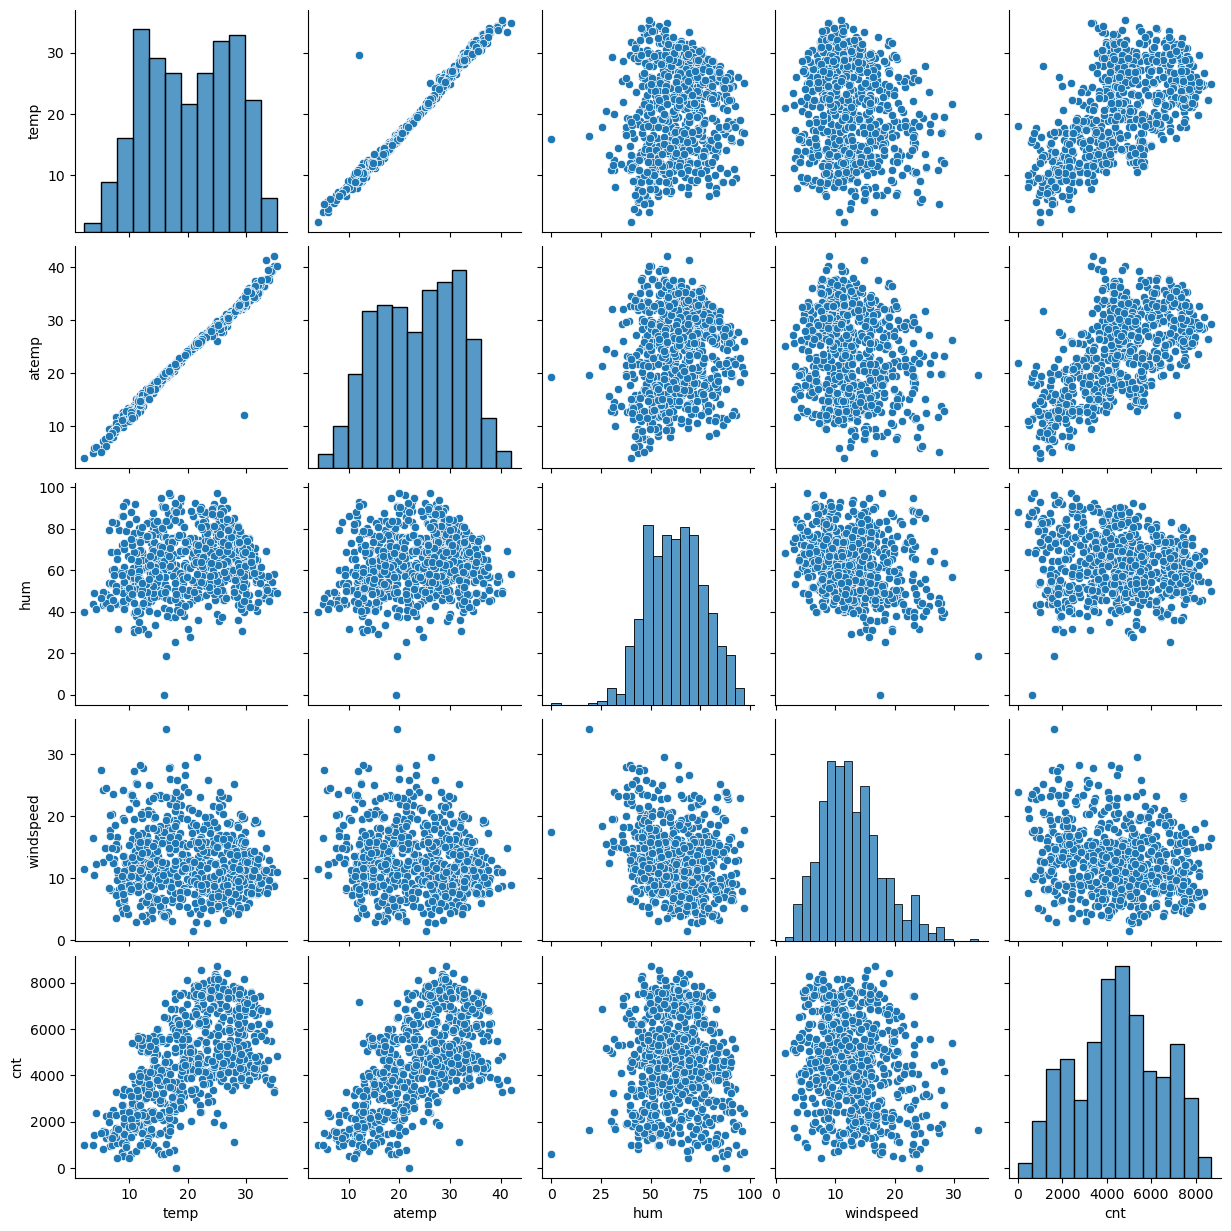

In [15]:
sns.pairplot(bike_df[numeric_columns])
plt.show()

In [16]:
# Correlation matrix
corr_bike_data = bike_df[numeric_columns].corr()
corr_bike_data

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


<Axes: >

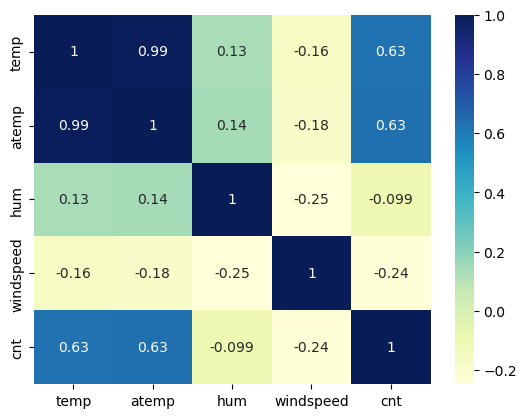

In [17]:
sns.heatmap(corr_bike_data, annot=True,cmap="YlGnBu")

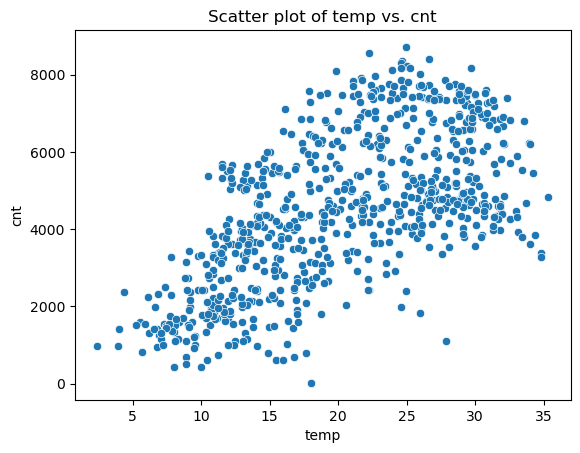

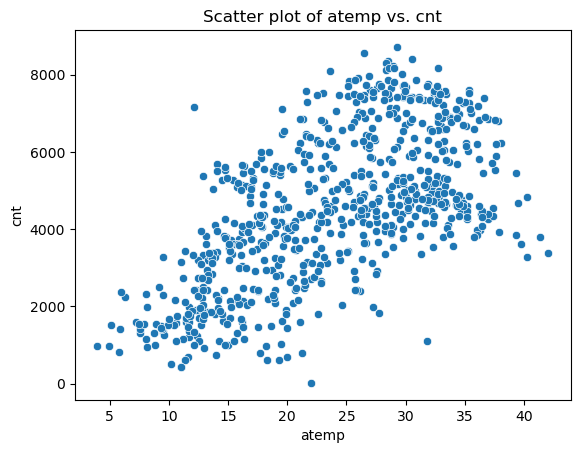

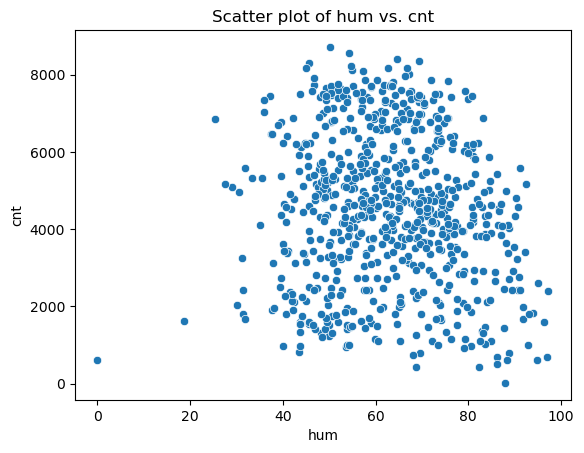

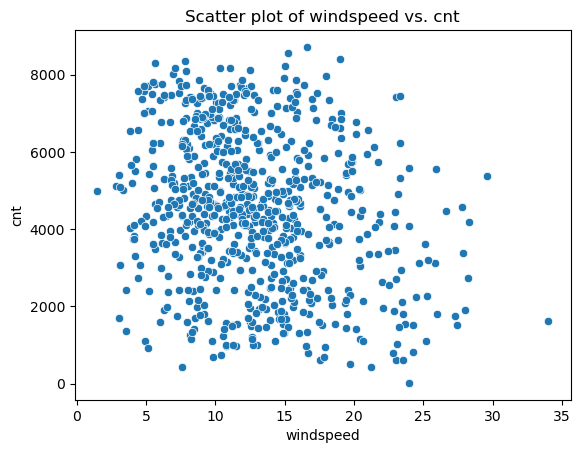

In [18]:


numeric_columns.remove('cnt')  # remove 'cnt' from the list

# Plot scatter plots for each numeric column against 'cnt'
for column in numeric_columns:
    sns.scatterplot(x=column, y='cnt', data=bike_df)
    plt.title(f'Scatter plot of {column} vs. cnt')
    plt.xlabel(column)
    plt.ylabel('cnt')
    plt.show()

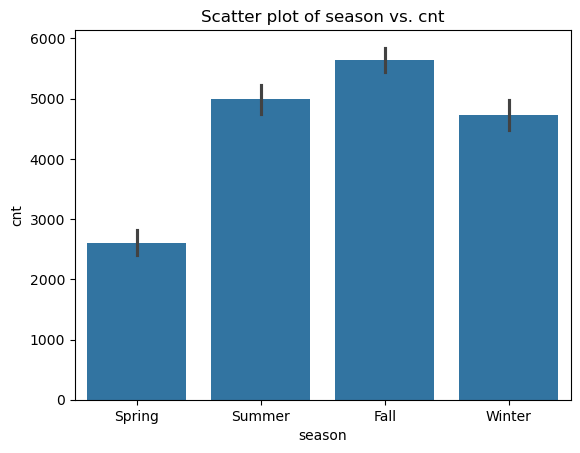

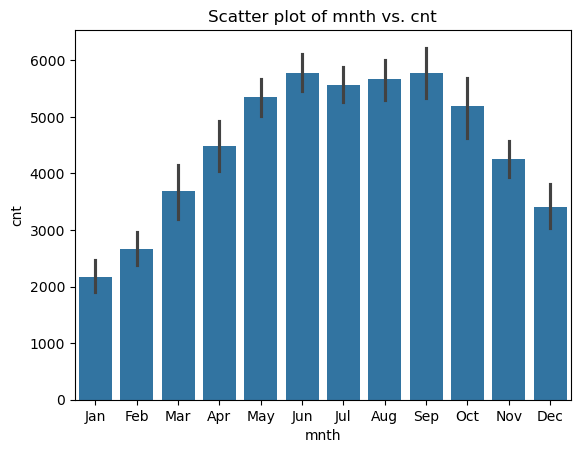

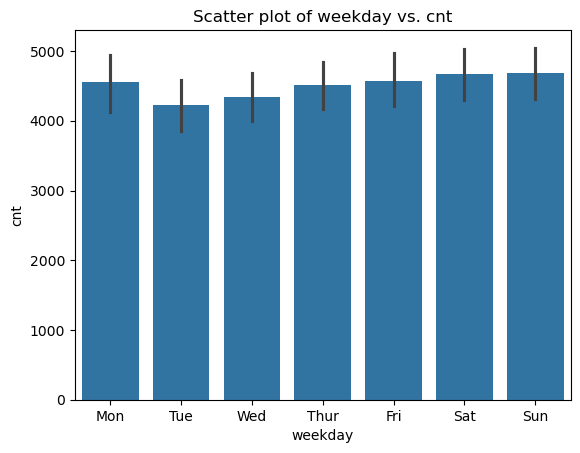

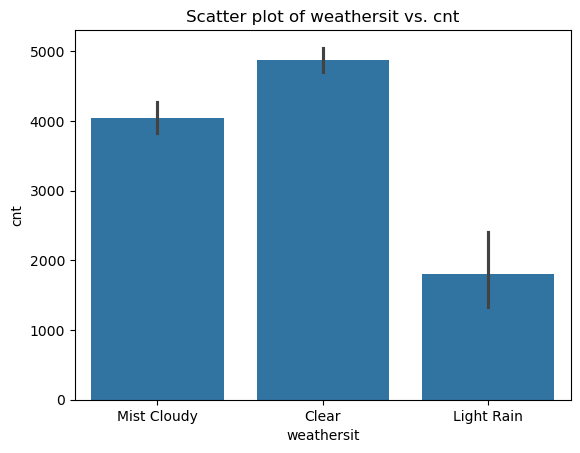

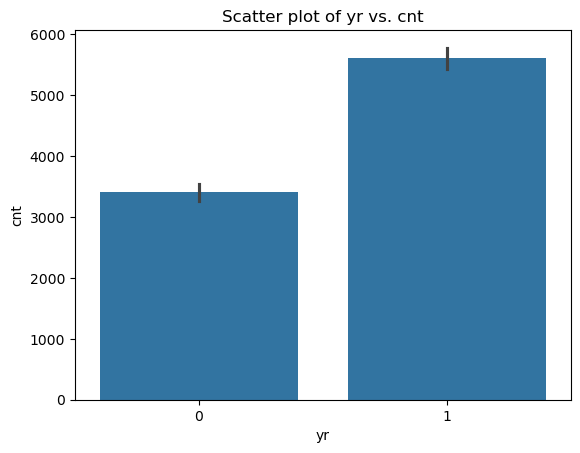

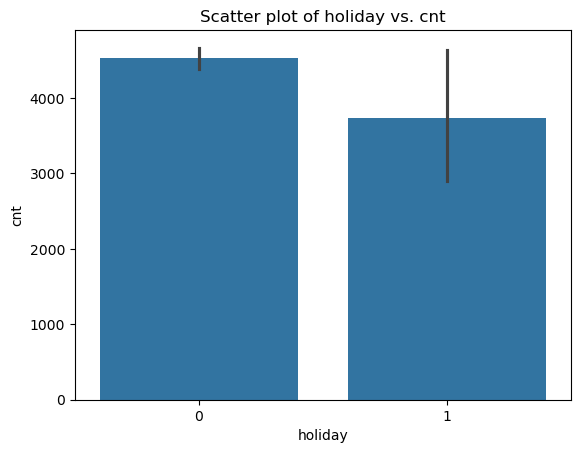

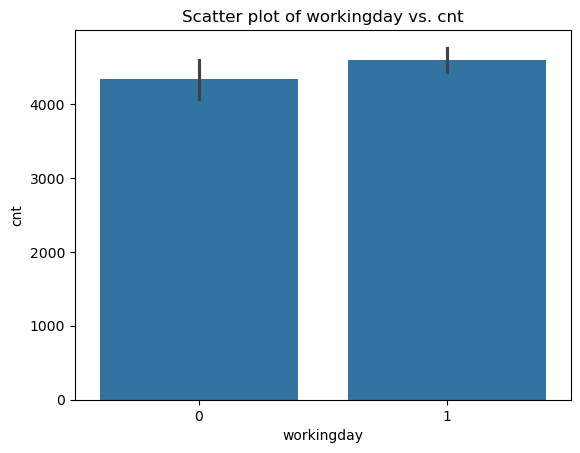

In [19]:
# Get all categorical columns and add 'yr', 'holiday', 'workingday' to the list
cat_columns = bike_df.select_dtypes(include='object').columns.tolist()
cat_columns.extend(['yr', 'holiday', 'workingday'])
# Plot scatter plots for each categorical column against 'cnt'
for column in cat_columns:
    sns.barplot(x=column, y='cnt', data=bike_df)
    plt.title(f'Scatter plot of {column} vs. cnt')
    plt.xlabel(column)
    plt.ylabel('cnt')
    plt.show()

#### 4.3. Multivariate Analysis

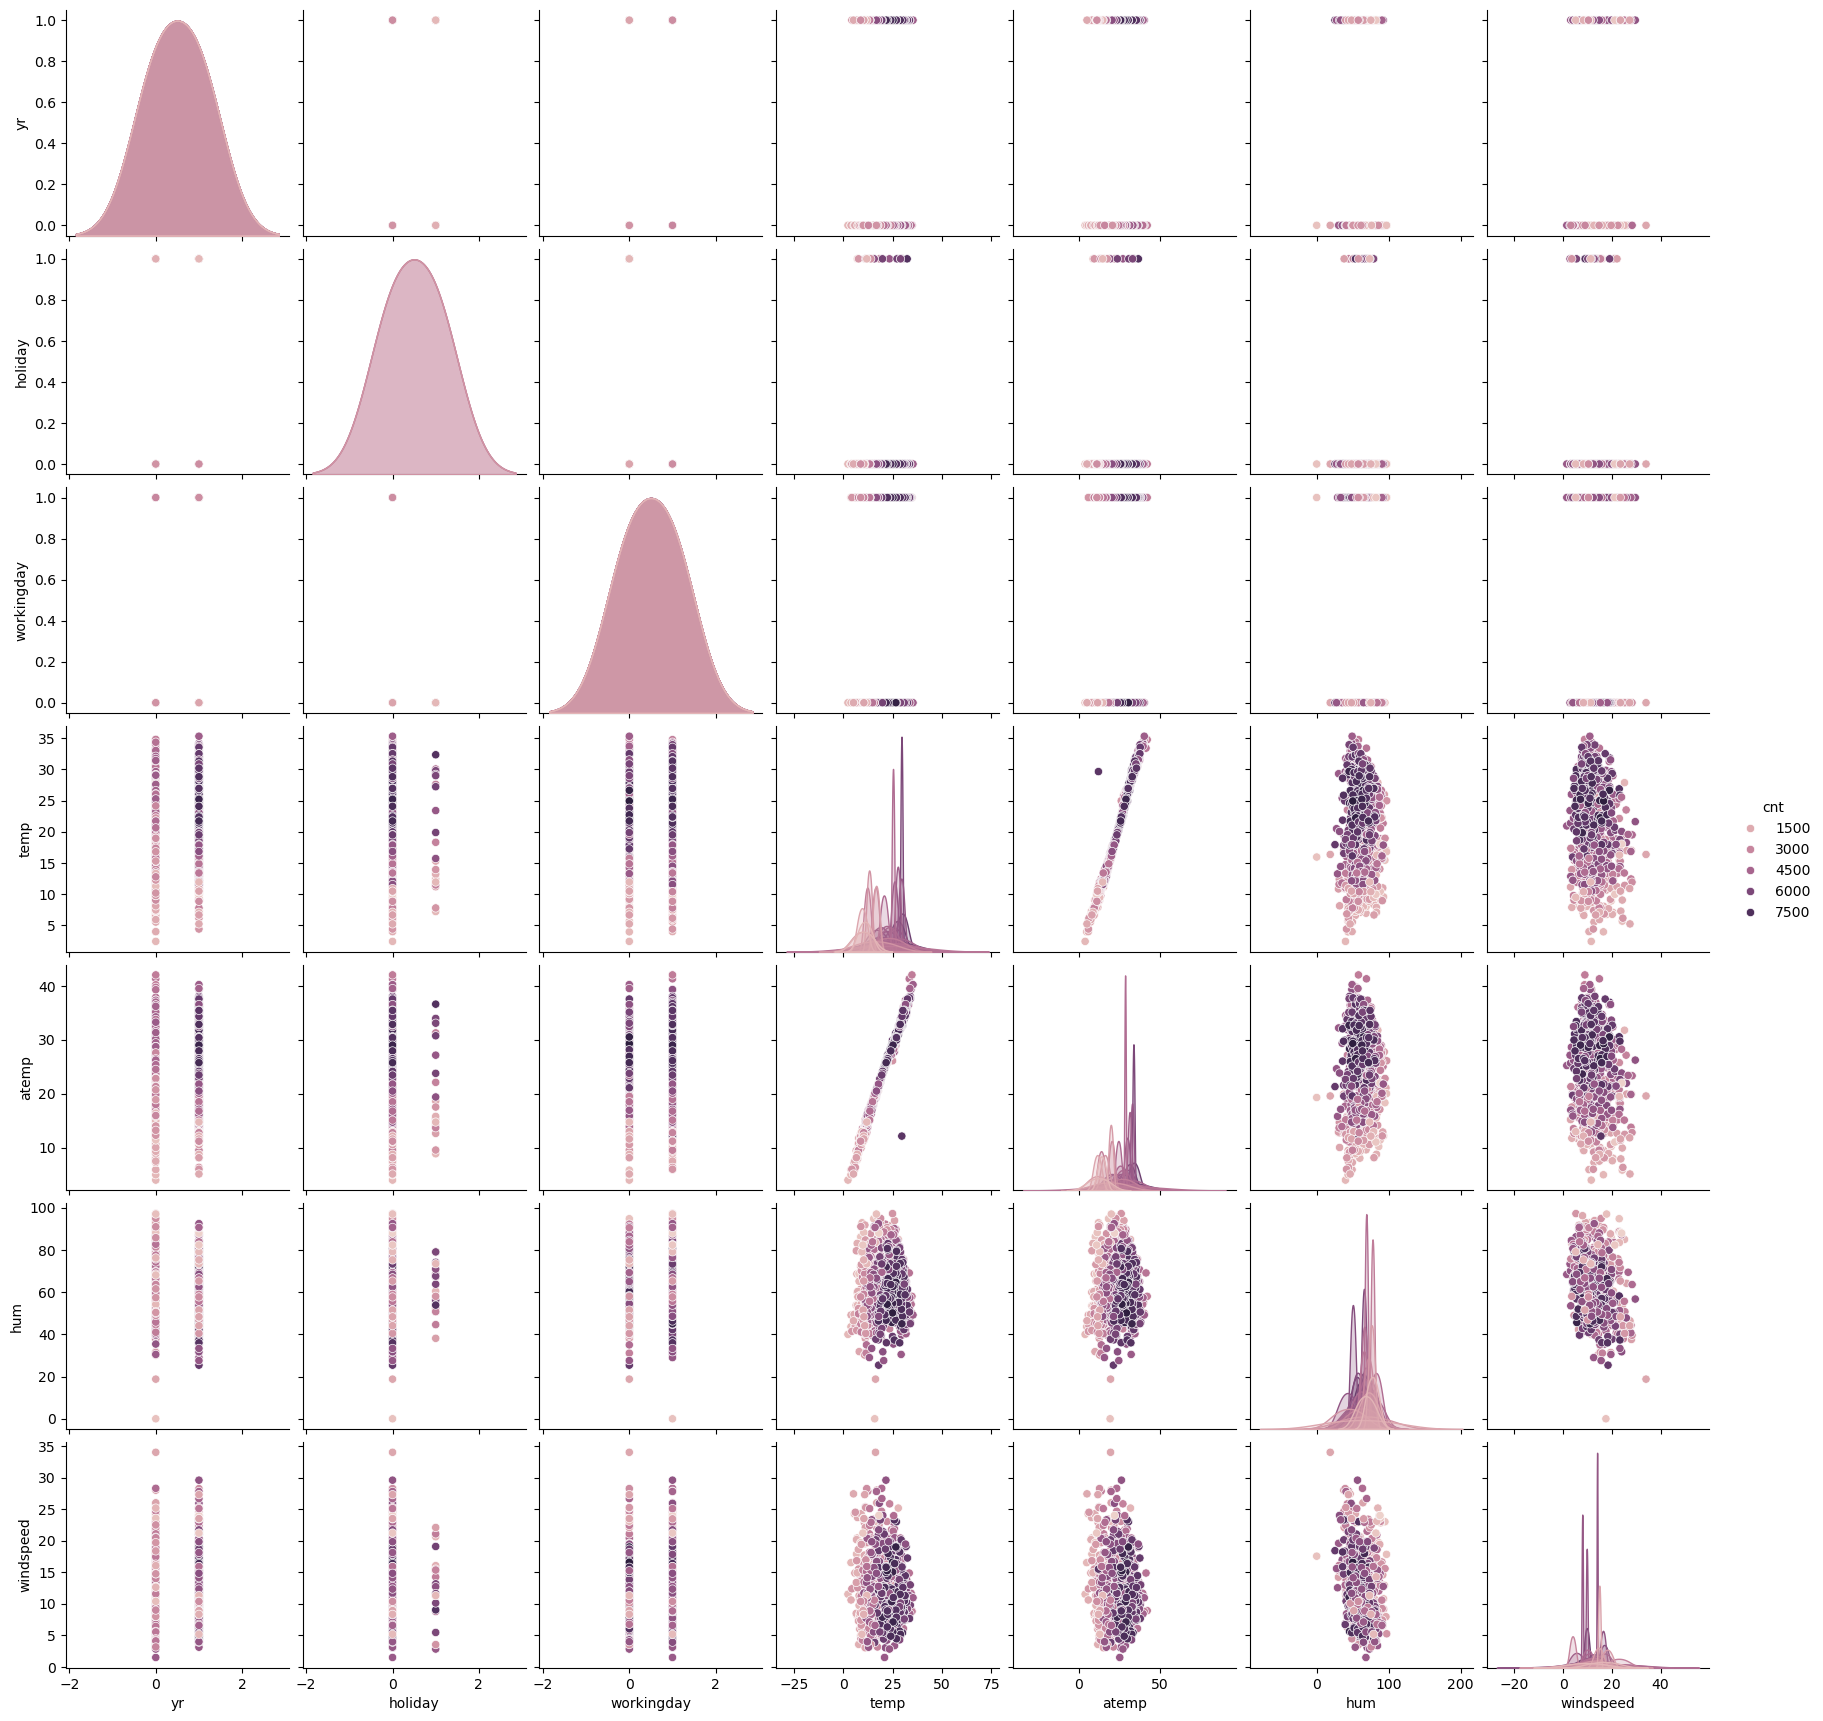

In [20]:
sns.pairplot(bike_df, hue='cnt', diag_kind='kde')
plt.show()

##### Colinearity Check for Numerical Fields
Since graph shows _temp_ and _atemp_ are highly correlated we can get rid of one of the column. Since 'temp' would be more relevant than 'atemp' so drop 'atemp'.

In [21]:
bike_df.drop(['atemp'], axis = 1, inplace = True)

### 5. Model Building:

### 5.1. Data preparation for model building

In this section, we'll prepare the date for modelling by scaling, changing the cat. variables, and creating train/test data

In [22]:
# Get all categorical columns for dummification
# Get all categorical columns except 'yr', 'holiday', 'workingday' as they are already in numeric format
categorical_columns = bike_df.select_dtypes(include='object').columns.tolist()
categorical_columns

['season', 'mnth', 'weekday', 'weathersit']

#### 5.1.1. Dummy Variables
 - Variable `season` has four levels. 
 - Variable `mnth` has twelve levels.
 - Variable `weekday` has seven levels.
 - Variable `weathersit` has four levels, but the data set has only three values.

We need to convert these levels into integer as well. For this, we will use something called `dummy variables`.

In [23]:
# Create dummies
dummy_df = pd.get_dummies(bike_df[categorical_columns], drop_first=True).astype(int)
dummy_df

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Light Rain,weathersit_Mist Cloudy
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
726,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
727,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [24]:
bike_df.drop(categorical_columns, axis = 1, inplace = True)
bike_df = pd.concat([bike_df, dummy_df], axis=1)
bike_df

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Light Rain,weathersit_Mist Cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,65.2917,23.458911,2114,1,0,0,...,0,0,0,1,0,0,0,0,0,1
726,1,0,1,10.386653,59.0000,10.416557,3095,1,0,0,...,0,0,0,0,1,0,0,0,0,1
727,1,0,0,10.386653,75.2917,8.333661,1341,1,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,10.489153,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,0,0,1,0,0,0


#### 5.1.2. Re-check colinearity

<Axes: >

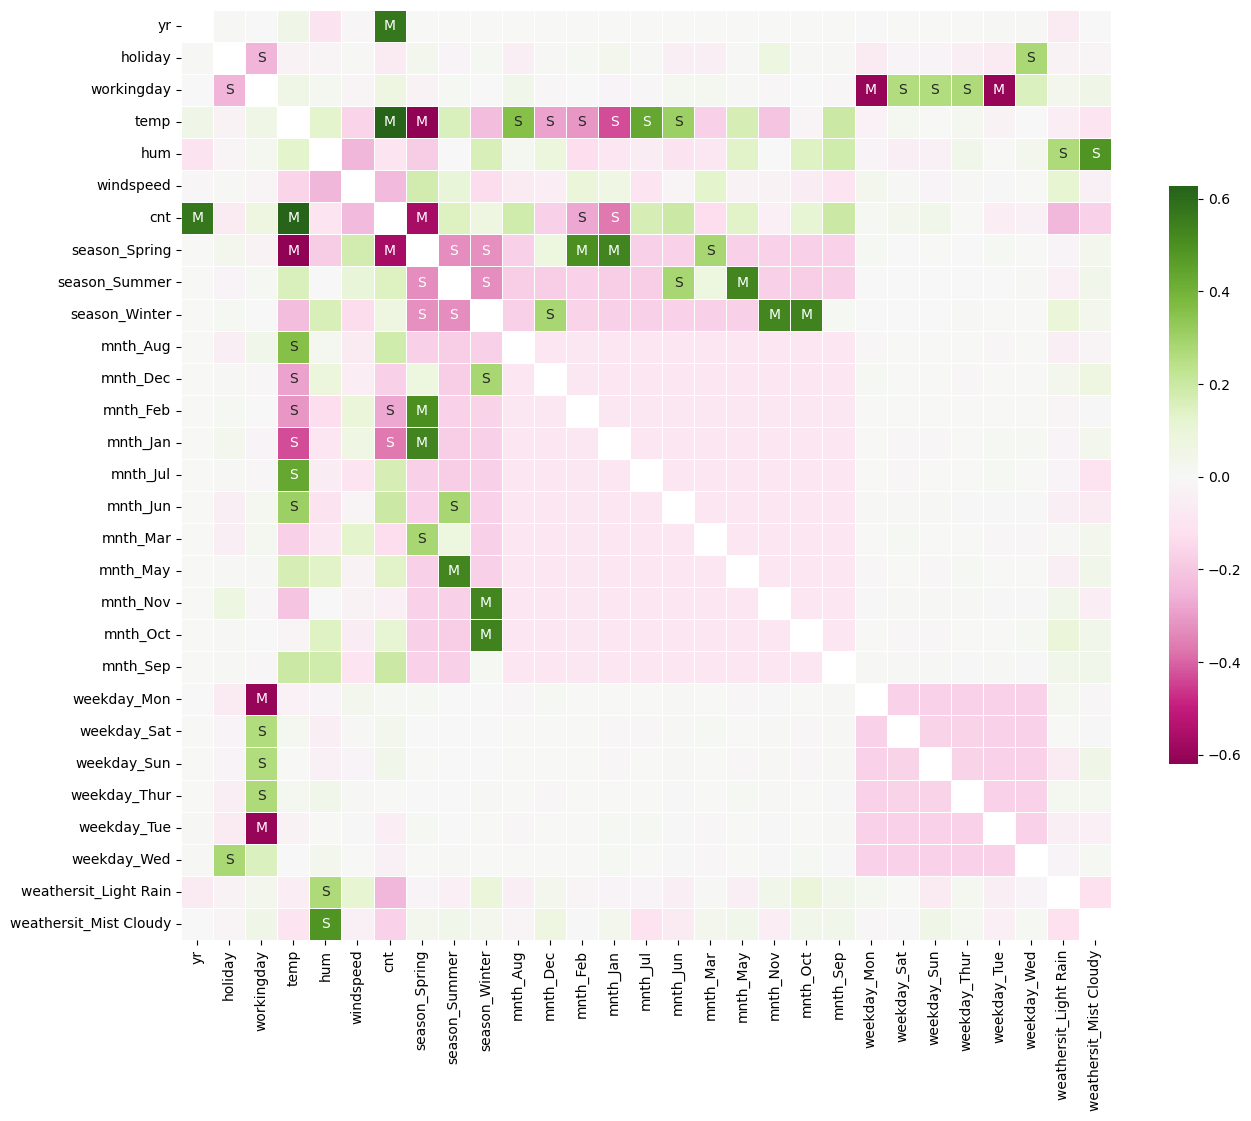

In [25]:
# Create labels for the correlation matrix
labels = np.where(np.abs(bike_df.corr()) > 0.75, "H",
                    np.where(np.abs(bike_df.corr()) > 0.5, "M",
                            np.where(np.abs(bike_df.corr())>0.25, "S", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(bike_df.corr(), mask=np.eye(len(bike_df.corr())), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="PiYG", cbar_kws={"shrink": 0.5})

Still there seems to be some colinearities between some variables. 
Let's check VIF for all variables later during model building.

### 5.2. Splitting the Data into Training and Testing Sets

In [26]:
# We specify this so that the train and test data set always have the same rows, respectively
# divide the data inot 70:30 ration
df_train, df_test = train_test_split(bike_df, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(219, 29)


#### 5.3. Rescaling the Features 

We will use MinMax scaling.

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [28]:
bike_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thur', 'weekday_Tue',
       'weekday_Wed', 'weathersit_Light Rain', 'weathersit_Mist Cloudy'],
      dtype='object')

In [29]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
columns_to_scale = ['temp', 'hum', 'windspeed', 'cnt']
df_train[columns_to_scale] = scaler.fit_transform(df_train[columns_to_scale])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Light Rain,weathersit_Mist Cloudy
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,1,0,0,0,0,0,0,1


#### 5.4. Dividing into X and Y sets for the model building

In [30]:
y_train = df_train.pop('cnt')
X_train = df_train

# just to confirm if the X and Y variables are created correcty for training data set
print(y_train.shape)
print(X_train.shape)

(510,)
(510, 28)


### 5.5. Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn).

### RFE
Recursive feature elimination

In [31]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [32]:
# Running RFE with the output number of the variable equal to 21
estimator = LinearRegression()

# Specify the number of features to select
num_features_to_select = 21 # starting with 21 features

# Instantiate RFE with the estimator and number of features to select
rfe = RFE(estimator, n_features_to_select=num_features_to_select)
rfe = rfe.fit(X_train, y_train)

In [33]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', True, 1),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 7),
 ('mnth_Mar', False, 8),
 ('mnth_May', True, 1),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 4),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', False, 6),
 ('weekday_Sun', False, 5),
 ('weekday_Thur', False, 3),
 ('weekday_Tue', True, 1),
 ('weekday_Wed', False, 2),
 ('weathersit_Light Rain', True, 1),
 ('weathersit_Mist Cloudy', True, 1)]

In [34]:
# Features selected by RFE, we will use these features to build the model
# Subset the features selected by rfe
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_May', 'mnth_Nov',
       'mnth_Sep', 'weekday_Mon', 'weekday_Tue', 'weathersit_Light Rain',
       'weathersit_Mist Cloudy'],
      dtype='object')

In [35]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['mnth_Jun', 'mnth_Mar', 'mnth_Oct', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thur', 'weekday_Wed'],
      dtype='object')

In [36]:
# Subsetting training data for 21 selected columns
X_train_rfe = X_train[col]

# Adding a constant variable as required by statsmodels library
# Add a constant to the model
X_train_sm = sm.add_constant(X_train_rfe)
X_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_Aug,...,mnth_Feb,mnth_Jan,mnth_Jul,mnth_May,mnth_Nov,mnth_Sep,weekday_Mon,weekday_Tue,weathersit_Light Rain,weathersit_Mist Cloudy
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [37]:

print(X_train_sm.shape)
print(X_train.shape)

(510, 22)
(510, 28)


#### Model Training: Iterartion 1

In [38]:
# Now the training set contains only 15 columns, we'll build the model now
# Model I: with RFE suggested variables
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit() # Running the linear model
lr_model.params

const                     0.242173
yr                        0.231574
holiday                  -0.000679
workingday                0.092245
temp                      0.448285
hum                      -0.153220
windspeed                -0.186668
season_Spring            -0.046532
season_Summer             0.036931
season_Winter             0.109946
mnth_Aug                  0.014779
mnth_Dec                 -0.049908
mnth_Feb                 -0.035476
mnth_Jan                 -0.065837
mnth_Jul                 -0.040686
mnth_May                  0.025347
mnth_Nov                 -0.047415
mnth_Sep                  0.080191
weekday_Mon               0.102419
weekday_Tue               0.048188
weathersit_Light Rain    -0.255587
weathersit_Mist Cloudy   -0.060155
dtype: float64

In [39]:
#Let's see the summary of our linear model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     141.2
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          1.62e-188
Time:                        19:59:15   Log-Likelihood:                 526.45
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     489   BIC:                            -922.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2422      0.032      7.586      0.000       0.179       0.305
yr                         0.2316      0.008     29.102      0.000       0.216       0.247
holiday                   -0.0007      0.022     -0.031      0.975      -0.044       0.042
workingday                 0.0922      0.010      8.994      0.000       0.072       0.112
temp                       0.4483      0.038     11.711      0.000       0.373       0.523
hum                       -0.1532      0.038     -4.077      0.000      -0.227      -0.079
windspeed                 -0.1867      0.025     -7.354      0.000      -0.237      -0.137
season_Spring             -0.0465      0.027     -1.753      0.080      -0.099       0.006
season_Summer              0.0369      0.023      1.590      0.112      -0.009       0.083
season_Winter              0.1099      0.023      4.868      0.000       0.066       0.154
mnth_Aug                   0.0148      0.024      0.628      0.530      -0.031       0.061
mnth_Dec                  -0.0499      0.018     -2.760      0.006      -0.085      -0.014
mnth_Feb                  -0.0355      0.021     -1.661      0.097      -0.077       0.006
mnth_Jan                  -0.0658      0.021     -3.108      0.002      -0.107      -0.024
mnth_Jul                  -0.0407      0.025     -1.658      0.098      -0.089       0.008
mnth_May                   0.0253      0.017      1.466      0.143      -0.009       0.059
mnth_Nov                  -0.0474      0.019     -2.533      0.012      -0.084      -0.011
mnth_Sep                   0.0802      0.021      3.753      0.000       0.038       0.122
weekday_Mon                0.1024      0.012      8.327      0.000       0.078       0.127
weekday_Tue                0.0482      0.013      3.821      0.000       0.023       0.073
weathersit_Light Rain     -0.2556      0.026     -9.798      0.000      -0.307      -0.204
weathersit_Mist Cloudy    -0.0602      0.010     -5.822      0.000      -0.080      -0.040
==============================================================================
Omnibus:                       83.100   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.413
Skew:                          -0.781   Prob(JB):                     1.70e-52
Kurtosis:                       5.963   Cond. No.                     1.31e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.95e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

P-Values for all the selected features are well witrhoin 0.05 range.
Let's check the VIF for multicollinearity.

In [40]:
X_train_new = X_train_sm.drop(['const'], axis=1)

In [41]:
X_train_new.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_May', 'mnth_Nov',
       'mnth_Sep', 'weekday_Mon', 'weekday_Tue', 'weathersit_Light Rain',
       'weathersit_Mist Cloudy'],
      dtype='object')

In [42]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,68.63
17,weekday_Mon,16.49
18,weekday_Tue,15.48
6,season_Spring,8.54
7,season_Summer,6.57
8,season_Winter,6.28
3,temp,4.91
1,holiday,3.70
9,mnth_Aug,3.17
13,mnth_Jul,2.80


#### Model Training: Interation 2
Rebuilding the model without `weekday_Mon` & `weekday_Tue` as it has a hight VIF. `workingday` looks to be signigicant and might be coreleated with `weekday_Mon` & `weekday_Tue`.

In [43]:
# Remove `mnth_Aug` as it has high p-value
X_train_new = X_train_rfe.drop(["weekday_Mon", "weekday_Tue"], axis = 1)

In [44]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_new = sm.add_constant(X_train_new)
# Running the linear model
lm = sm.OLS(y_train, X_train_new).fit()
#Let's see the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     144.1
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          1.35e-186
Time:                        19:59:15   Log-Likelihood:                 519.18
No. Observations:                 510   AIC:                            -998.4
Df Residuals:                     490   BIC:                            -913.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.3209      0.040      7.973      0.000       0.242       0.400
yr                         0.2307      0.008     28.627      0.000       0.215       0.247
holiday                   -0.0766      0.026     -2.921      0.004      -0.128      -0.025
workingday                 0.0159      0.009      1.814      0.070      -0.001       0.033
temp                       0.4503      0.039     11.610      0.000       0.374       0.526
hum                       -0.1647      0.038     -4.338      0.000      -0.239      -0.090
windspeed                 -0.1858      0.026     -7.225      0.000      -0.236      -0.135
season_Spring             -0.0431      0.027     -1.605      0.109      -0.096       0.010
season_Summer              0.0401      0.024      1.705      0.089      -0.006       0.086
season_Winter              0.1119      0.023      4.892      0.000       0.067       0.157
mnth_Aug                   0.0191      0.024      0.802      0.423      -0.028       0.066
mnth_Dec                  -0.0472      0.018     -2.578      0.010      -0.083      -0.011
mnth_Feb                  -0.0382      0.022     -1.767      0.078      -0.081       0.004
mnth_Jan                  -0.0653      0.021     -3.041      0.002      -0.107      -0.023
mnth_Jul                  -0.0391      0.025     -1.572      0.117      -0.088       0.010
mnth_May                   0.0240      0.018      1.371      0.171      -0.010       0.058
mnth_Nov                  -0.0472      0.019     -2.487      0.013      -0.084      -0.010
mnth_Sep                   0.0840      0.022      3.884      0.000       0.042       0.126
weathersit_Light Rain     -0.2484      0.026     -9.422      0.000      -0.300      -0.197
weathersit_Mist Cloudy    -0.0571      0.010     -5.471      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       69.779   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.588
Skew:                          -0.653   Prob(JB):                     1.68e-44
Kurtosis:                       5.789   Cond. No.                         26.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Let's calcuate VIF for better selection of features.

In [45]:
X_train_new.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_May', 'mnth_Nov',
       'mnth_Sep', 'weathersit_Light Rain', 'weathersit_Mist Cloudy'],
      dtype='object')

In [46]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [47]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,33.37
3,temp,21.64
6,season_Spring,7.18
8,season_Winter,5.85
7,season_Summer,5.69
5,windspeed,4.90
2,workingday,3.23
9,mnth_Aug,3.10
13,mnth_Jul,2.77
12,mnth_Jan,2.41


In [48]:
X_train_new.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_May', 'mnth_Nov',
       'mnth_Sep', 'weathersit_Light Rain', 'weathersit_Mist Cloudy'],
      dtype='object')

#### Model Training: Interation 3
Rebuilding the model without `hum` as it has high VIF. Let's recalculate VIF after rebuilding model.

In [49]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [50]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_new).fit()   # Running the linear model
#Let's see the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     145.7
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          1.06e-183
Time:                        19:59:15   Log-Likelihood:                 509.57
No. Observations:                 510   AIC:                            -981.1
Df Residuals:                     491   BIC:                            -900.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2454      0.037      6.643      0.000       0.173       0.318
yr                         0.2346      0.008     28.762      0.000       0.219       0.251
holiday                   -0.0770      0.027     -2.887      0.004      -0.129      -0.025
workingday                 0.0165      0.009      1.857      0.064      -0.001       0.034
temp                       0.4103      0.038     10.698      0.000       0.335       0.486
windspeed                 -0.1565      0.025     -6.195      0.000      -0.206      -0.107
season_Spring             -0.0535      0.027     -1.962      0.050      -0.107    8.17e-05
season_Summer              0.0333      0.024      1.395      0.164      -0.014       0.080
season_Winter              0.0952      0.023      4.145      0.000       0.050       0.140
mnth_Aug                   0.0148      0.024      0.609      0.543      -0.033       0.062
mnth_Dec                  -0.0551      0.019     -2.969      0.003      -0.091      -0.019
mnth_Feb                  -0.0408      0.022     -1.853      0.064      -0.084       0.002
mnth_Jan                  -0.0729      0.022     -3.346      0.001      -0.116      -0.030
mnth_Jul                  -0.0370      0.025     -1.464      0.144      -0.087       0.013
mnth_May                   0.0146      0.018      0.824      0.410      -0.020       0.049
mnth_Nov                  -0.0481      0.019     -2.493      0.013      -0.086      -0.010
mnth_Sep                   0.0747      0.022      3.408      0.001       0.032       0.118
weathersit_Light Rain     -0.2947      0.025    -12.012      0.000      -0.343      -0.247
weathersit_Mist Cloudy    -0.0829      0.009     -9.503      0.000      -0.100      -0.066
==============================================================================
Omnibus:                       72.402   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.103
Skew:                          -0.678   Prob(JB):                     3.92e-46
Kurtosis:                       5.828   Cond. No.                         24.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
X_train_new.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'windspeed',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_May', 'mnth_Nov',
       'mnth_Sep', 'weathersit_Light Rain', 'weathersit_Mist Cloudy'],
      dtype='object')

In [52]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [53]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,12.00
5,season_Spring,5.49
4,windspeed,4.82
6,season_Summer,4.59
7,season_Winter,4.16
2,workingday,3.21
8,mnth_Aug,2.95
12,mnth_Jul,2.72
11,mnth_Jan,2.28
0,yr,2.09


In [54]:
X_train_new.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jul', 'mnth_May', 'mnth_Nov', 'mnth_Sep',
       'weathersit_Light Rain', 'weathersit_Mist Cloudy'],
      dtype='object')

#### Model Training: Interation 4
Rebuilding the model without `season_Summer`, `mnth_Aug`, `mnth_May`, `mnth_Jul` as it has high p-value.

In [55]:
X_train_new = X_train_new.drop(["season_Summer", "mnth_Aug", "mnth_May", "mnth_Jul"], axis = 1)

In [56]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_new).fit()   # Running the linear model
#Let's see the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     181.5
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          1.32e-184
Time:                        19:59:15   Log-Likelihood:                 501.02
No. Observations:                 510   AIC:                            -972.0
Df Residuals:                     495   BIC:                            -908.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.3054      0.026     11.646      0.000       0.254       0.357
yr                         0.2359      0.008     28.662      0.000       0.220       0.252
holiday                   -0.0738      0.027     -2.733      0.006      -0.127      -0.021
workingday                 0.0180      0.009      1.997      0.046       0.000       0.036
temp                       0.3435      0.031     11.040      0.000       0.282       0.405
windspeed                 -0.1531      0.025     -6.029      0.000      -0.203      -0.103
season_Spring             -0.0878      0.018     -4.976      0.000      -0.123      -0.053
season_Winter              0.0692      0.014      4.859      0.000       0.041       0.097
mnth_Dec                  -0.0679      0.018     -3.719      0.000      -0.104      -0.032
mnth_Feb                  -0.0512      0.022     -2.328      0.020      -0.094      -0.008
mnth_Jan                  -0.0885      0.021     -4.124      0.000      -0.131      -0.046
mnth_Nov                  -0.0596      0.019     -3.125      0.002      -0.097      -0.022
mnth_Sep                   0.0630      0.016      4.045      0.000       0.032       0.094
weathersit_Light Rain     -0.2998      0.025    -12.087      0.000      -0.349      -0.251
weathersit_Mist Cloudy    -0.0797      0.009     -9.095      0.000      -0.097      -0.062
==============================================================================
Omnibus:                       78.049   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.089
Skew:                          -0.731   Prob(JB):                     8.04e-50
Kurtosis:                       5.916   Cond. No.                         16.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
X_train_new.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Nov', 'mnth_Sep', 'weathersit_Light Rain',
       'weathersit_Mist Cloudy'],
      dtype='object')

In [58]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [59]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,4.83
4,windspeed,4.02
5,season_Spring,3.77
2,workingday,3.12
6,season_Winter,2.54
9,mnth_Jan,2.20
0,yr,2.06
8,mnth_Feb,1.88
10,mnth_Nov,1.82
7,mnth_Dec,1.55


#### Model Training: Interation 5
Rebuilding the model without `season_Spring` as it has high VIF. `temp` has even higher but it is quite significant and dropping `temp` brings down R-squared value significanlty.

**_Please Note:_**
**We tried to build model without `temp` as it had high VIF. But it brought R-squared to 76.2%. We might not want to get rid of `Temperature' then try to drop soemthing else which has lower signiifcance.**

In [60]:
X_train_new = X_train_new.drop(["season_Spring"], axis = 1)

In [61]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_new).fit()   # Running the linear model
#Let's see the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     184.7
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          1.59e-180
Time:                        19:59:16   Log-Likelihood:                 488.57
No. Observations:                 510   AIC:                            -949.1
Df Residuals:                     496   BIC:                            -889.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2509      0.024     10.287      0.000       0.203       0.299
yr                         0.2349      0.008     27.891      0.000       0.218       0.251
holiday                   -0.0763      0.028     -2.763      0.006      -0.131      -0.022
workingday                 0.0187      0.009      2.028      0.043       0.001       0.037
temp                       0.4099      0.029     14.250      0.000       0.353       0.466
windspeed                 -0.1603      0.026     -6.177      0.000      -0.211      -0.109
season_Winter              0.0977      0.013      7.309      0.000       0.071       0.124
mnth_Dec                  -0.0808      0.018     -4.372      0.000      -0.117      -0.044
mnth_Feb                  -0.1014      0.020     -5.067      0.000      -0.141      -0.062
mnth_Jan                  -0.1347      0.020     -6.798      0.000      -0.174      -0.096
mnth_Nov                  -0.0579      0.020     -2.970      0.003      -0.096      -0.020
mnth_Sep                   0.0659      0.016      4.133      0.000       0.035       0.097
weathersit_Light Rain     -0.2984      0.025    -11.752      0.000      -0.348      -0.248
weathersit_Mist Cloudy    -0.0770      0.009     -8.603      0.000      -0.095      -0.059
==============================================================================
Omnibus:                       65.319   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.360
Skew:                          -0.678   Prob(JB):                     4.99e-34
Kurtosis:                       5.319   Cond. No.                         16.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [63]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,4.73
4,windspeed,3.63
2,workingday,3.09
5,season_Winter,2.34
0,yr,2.06
9,mnth_Nov,1.81
12,weathersit_Mist Cloudy,1.53
6,mnth_Dec,1.41
8,mnth_Jan,1.26
7,mnth_Feb,1.21


This looks like a good fit now:
- p-value for all features less than 0.05.
- VIF is less than 5.
- R-squared is 82.9%.
- Adj. R-squared is	82.4%

### 5.6. Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like. 

**Residual Analysis:**

Check the residuals (errors) to ensure that:
- They are randomly distributed (no patterns).
- The variance of residuals is constant (homoscedasticity).
- They are approximately normally distributed.

In [64]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_sm = sm.add_constant(X_train_new)
y_train_cnt = lm.predict(X_train_sm)
y_train_cnt

653    0.762894
576    0.796176
426    0.549143
728    0.399125
482    0.540708
         ...   
526    0.708385
578    0.828615
53     0.233329
350    0.223203
79     0.297222
Length: 510, dtype: float64

In [65]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

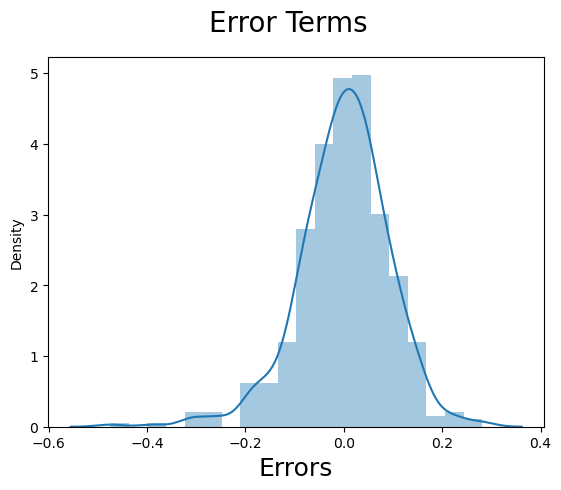

In [66]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Text(0, 0.5, 'y_train_cnt')

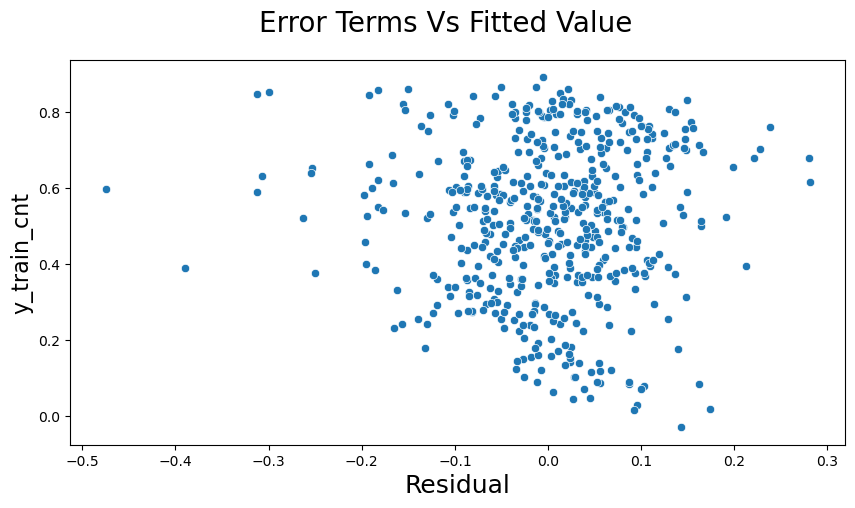

In [67]:
residual = y_train - y_train_cnt
fig = plt.figure(figsize=(10,5))
sns.scatterplot(x=residual, y=y_train_cnt)
fig.suptitle('Error Terms Vs Fitted Value', fontsize=20)     # Plot heading 
plt.xlabel('Residual', fontsize=18)                          # X-label
plt.ylabel('y_train_cnt', fontsize=16)

#### Insights:
- Yes, Residuals are randomly distributed (no patterns).
- Yes, The variance of residuals is constant (homoscedasticity).
- Yes, Residuals are approximately normally distributed.

### 6. Model Evaluation:

#### Making Predictions & Using the final model

In [68]:
df_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thur', 'weekday_Tue',
       'weekday_Wed', 'weathersit_Light Rain', 'weathersit_Mist Cloudy'],
      dtype='object')

In [69]:
columns_to_scale

['temp', 'hum', 'windspeed', 'cnt']

In [70]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
# For test set we run only transform as we have already fit the model on training set
df_test[columns_to_scale] = scaler.transform(df_test[columns_to_scale])

#### Dividing into X_test and y_test

In [71]:
y_test = df_test.pop('cnt')
X_test = df_test

In [72]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)


In [73]:
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

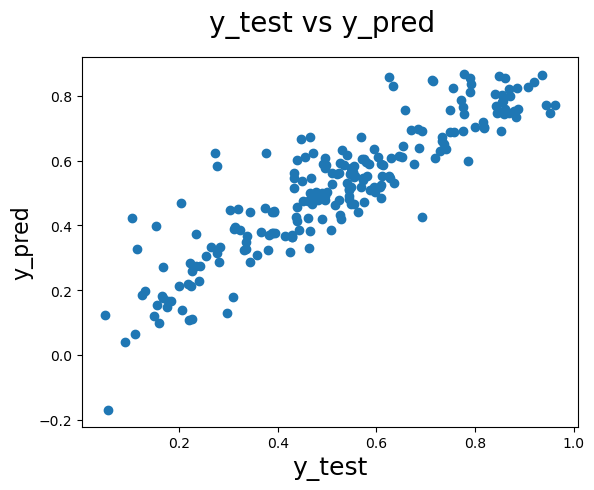

In [74]:
# Model Evaluation
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

A positive linear relationship between the y_test and y_pred indicates that the final model will be a good predictor of the business.

In [75]:
# Importing r2_score
from sklearn.metrics import r2_score
# Calculating r2_score
r2_score(y_test, y_pred)

0.8010919162374295

### Final Insights & Conclusions:

1. The of bike users have incressed significanly, positive coefficient shows that the business is likely to grow in coming years.
2. The user count is highly dependent on Temprature.
3. Wind speed & Light rains does impact the business.
4. The bike user is positively correlated with wokring day.
5. But Boom bike can run some dicsounted offers during holidays to grow their business.

The R² scores for the training set (82.9%) and the test set (80.1%) suggest that your linear regression model performs reasonably well. 